# 线性回归原理及实践
线性回归通过一个线性模型来适配观测数据，这个线性模型是在特征和响应之间构建一个关系。目的是预测当前被观察的对象的值。线性回归的实现过程主要包括建立线性模型和选择优化方法求解参数两部分。
### 1. 建立线性模型
想要一个成功的回归分析，在建立线性模型之前，确认以下信息很重要：  
**线性：**特征值与和预测值是线性相关  
**不含多重共线性：**数据有极少或没有多重共线性，当特征不是相互独立时，会引发多重共线性。  
**多元正态分布：**多元回归残差符合正态分布。  
**虚拟变量：** 当遇到数据是非数值数据类型时，使用分类数据是一个非常有效的方法。分据数据，是指反映事物类别的数据，是离散数据，其数值个数有限且值之间无序。比如，按性别分为男，女两类。在一个回归模中，这些分类值可以用虚拟变量来表示，变量通常取如1或0这样的值，来表示肯定或否定类型。  
**虚拟变量陷进：**虚拟变量陷进是指两个及以上变量之间高度相关的情形。简而言之，就是存在一个能够被其他变量预测出的变量，举一个存在重复类别的直观例子：对于男性类别，该类别也可以通过女性类别来定义，女性值为0时，表示男性，值为1时表示女性，反之亦然。解决虚拟变量陷进的方法是，类别变量数减去1，假如有m个类别，那么在模型构建时取(m-1)个虚拟变量，减去的那个变量可以看作是参考值。   
给定训练集: $X_{train} = (x^{(1)},x^{(2)},x^{(3)},...,x^{(i)})$，对于单个输入$x^{(i)}=(x_{1}^{(i)},x_{2}^{(i)},...,x_{n}^{(i)})$, 可得到线性模型为：
$$\hat{y}^{(i)} = w^T x^{(i)} + b = w_{1}x_{1}^{(i)}+w_{2}x_{2}^{(i)}+...+w_{n-1}x_{n-1}^{(i)}+w_{n}x_{n}^{(i)}+b\tag{1}$$
对应的损失函数$ \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) $为：
$$ \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y}^{(i)}-y^{(i)})^{2}\tag{2} $$
然后通过对所有训练样例求和来计算代价函数：
$$ J = \frac{1}{2m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)})\tag{3}$$
### 2. 选择优化方法
计算出代价函数后，需要选择优化方法来最小化代价函数，以得到合适的参数w和b。线性回归常用的优化方法为梯度下降法和最小二乘法。
#### 2.1 梯度下降法 
梯度下降法的过程为：首先执行前向传播和反向传播，然后根据反向传播得到的各个参数的偏导数，进行参数的更新。  
**前向传播**  
对于输入$X$，线性回归的预测值为：
$$\hat{Y} = w^T X + b = (\hat{y}^{(1)}, \hat{y}^{(2)}, ..., \hat{y}^{(m-1)}, \hat{y}^{(m)})\tag{4}$$
通过已知的训练数据与得到的预测值，可得到代价函数：
$$ J = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})^{2}\tag{5}$$
**反向传播**
$$ dW = \frac{\partial J}{\partial W} = \frac{1}{m}X(\hat{Y}-Y)^T\tag{6}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})\tag{7}$$
**更新参数**
$$ w = w - \alpha*dW\tag{8}$$
$$ b = b - \alpha*db\tag{9}$$
其中，$\alpha$为学习速率。
#### 2.2 最小二乘法
最小二乘法是一种数学优化技术。它通过最小化误差的平方和寻找数据的最佳函数匹配。利用最小二乘法可以简便地求得未知的数据，并使得这些求得的数据与实际数据之间误差的平方和为最小。
对于输入$X$，$\hat{Y} = w^T X + b$可转换为：
$$ W = \begin{bmatrix}w \\b \end{bmatrix}, \ X = \begin{bmatrix}X \\1 \end{bmatrix} \tag{10}$$
得到转换后的模型为：
$$\hat{Y} = W^T X \tag{11}$$
对应的损失函数：
$$ J = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})^{2} = \frac{1}{2m} (\hat{Y}-Y)^{T}(\hat{Y}-Y) \tag{12}$$
求出$dW$，并令$dW=0$，得到：
$$ dW = \frac{\partial J}{\partial W} = \frac{1}{m}X(\hat{Y}-Y)^T = \frac{1}{m}(XX^{T}W - XY) = 0 \tag{13}$$
求解得：
$$ W = (XX^{T})^{-1}XY \tag{14}$$
由公式(14)可知，线性回归可用最小二乘法求解参数的条件是$(XX^{T})$可逆，即矩阵$X$满秩。

### 学习目标
- 构建学习算法的通用框架，主要包括：
  - 数据预处理
  - 初始化参数
  - 计算代价函数及其梯度
  - 使用优化算法（最小二乘法，梯度下降法）
- 构建简单线性回归模型分析数据
- 构建多元线性回归模型分析数据

## 构建简单线性回归模型分析数据
### 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

E:\ruanjian\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 导入数据集
**数据集介绍：**  
该数据集共25个数据项，特征为Hours(时长)，要预测的值为Scores(分数)。  
**查看数据集前5行**

In [2]:
dataset = pd.read_csv('datasets/studentscores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
def load_dataset():
    data = np.loadtxt("datasets/studentscores.csv", dtype=np.str, delimiter=",")
    X_train = data[1:,:1].astype(np.float)
    y_train = data[1:,-1].astype(np.float)
    return X_train, y_train

In [4]:
X_train, y_train= load_dataset()

### 拆分数据集为训练集和测试集

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size = 1/4, random_state = 0)

### 数据集矢量化

In [6]:
X_train, y_train = X_train.T.reshape(1,-1), y_train.T.reshape(1,-1)
X_test, y_test = X_test.T.reshape(1,-1), y_test.T.reshape(1,-1)

### 1. 梯度下降法
### 参数初始化

In [7]:
def initialize_with_zeros(dim):
    """
    此函数为w创建一个形状为（dim，1）的零向量，并将b初始化为0。
    
    输入：
    dim -- w向量的大小 
    
    输出:
    w -- 初始化的向量
    b -- 初始化的偏差
    """
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### 计算代价函数及其梯度

In [8]:
def propagate(w, b, X, Y):
    """
    实现前向传播的代价函数及反向传播的梯度

    输入:
    w -- 权重, 一个numpy数组，大小为(特征数, 1)
    b -- 偏差, 一个标量
    X -- 训练数据，大小为 (特征数 , 样本数量)
    Y -- 真实"标签"向量，大小为(1, 样本数量)

    输出:
    cost -- 线性回归的代价函数
    dw -- 相对于w的损失梯度，因此与w的形状相同
    db -- 相对于b的损失梯度，因此与b的形状相同
    """
    
    m = X.shape[1]
    
    # 前向传播
    Y_hat = np.dot(w.T,X)+b
    cost = np.dot((Y_hat - Y),(Y_hat - Y).T)/(2*m)
    
    # 反向传播
    dw = np.dot(X,(Y_hat-Y).T)/m
    db = np.sum(Y_hat-Y)/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### 梯度下降法优化参数

In [9]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    """
    此函数通过运行梯度下降算法来优化w和b
    
    输入:
    w -- 权重, 一个numpy数组，大小为(特征数, 1)
    b -- 偏差, 一个标量
    X -- 训练数据，大小为 (特征数 , 样本数量)
    Y -- 真实"标签"向量，大小为(1, 样本数量)
    num_iterations -- 优化循环的迭代次数
    learning_rate -- 梯度下降更新规则的学习率
    print_cost -- 是否每200步打印一次成本
    
    输出:
    params -- 存储权重w和偏见b的字典
    grads -- 存储权重梯度相对于代价函数偏导数的字典
    costs -- 在优化期间计算的所有损失的列表，这将用于绘制学习曲线。
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # 成本和梯度计算
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # 更新参数
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # 记录成本
        if i % 200 == 0:
            costs.append(cost)
        
        # 每200次训练迭代打印成本
        if i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### 2. 最小二乘法

In [10]:
def least_squares(X, Y):
    '''
    最小二乘法求解参数w,b
    
    输入:
    X -- 训练数据，大小为 (特征数 , 样本数量)
    Y -- 真实值向量，大小为(1, 样本数量)
    输出：
    w -- 权重, 一个numpy数组，大小为(特征数, 1)
    b -- 偏差, 一个标量
    '''
    X = np.concatenate((X,np.ones((1,X.shape[1]))),axis=0)
    W = np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,Y.T))
    w = W[:-1]
    b = W[-1]
    return w, b

### 定义预测函数

In [11]:
def predict(w, b, X):
    '''
    使用线性回归参数（w，b）预测结果
    
    输入:
    w -- 权重, 一个numpy数组，大小为(特征数, 1)
    b -- 偏差, 一个标量
    X -- 训练数据，大小为 (特征数 , 样本数量)
    
    输出:
    Y_prediction -- 包含X中示例的所有预测（0/1）的numpy数组（向量）
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    Y_prediction = np.dot(w.T,X)+b
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

### 构建线性回归模型

In [12]:
def model(X_train, Y_train, X_test, Y_test, optimization = "gradient descent",num_iterations = 2000, learning_rate = 0.5):
    """
    通过调用前面实现的函数来构建线性回归模型
    
    输入:
    X_train -- 由numpy数组表示的训练集，大小为 (特征数，训练样本数)
    Y_train -- 由numpy数组（向量）表示的训练标签，大小为 (1, 训练样本数)
    X_test -- 由numpy数组表示的测试集，大小为（特征数，测试样本数）
    Y_test -- 由numpy数组（向量）表示的测试标签，大小为 (1, 测试样本数)
    optimization -- 选择优化方法，设为"gradient descent"时为梯度下降法，设为"least squares"时为最小二乘法。
    num_iterations -- 超参数，表示优化参数的迭代次数
    learning_rate -- 超参数，在优化算法更新规则中使用的学习率
    
    输出:
    d -- 包含模型信息的字典。
    """
    if optimization == "gradient descent":
        # 初始化参数
        w, b = initialize_with_zeros(X_train.shape[0])

        # 梯度下降
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
        # 从字典“parameters”中检索参数w和b
        w = parameters["w"]
        b = parameters["b"]   
    elif optimization == "least squares":
        w, b = least_squares(X_train, Y_train)
    else:
        print("TypeError: model() got an unexpected keyword argument 'optimize'")
    # 预测测试/训练集
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # 打印测试集的预测结果
    print("Test data predict value : {}".format(Y_prediction_test))
    print("The test data true value: {}".format(Y_test))
    
    d = {"Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

### 模型训练与测试

In [13]:
d_simple = model(X_train, y_train, X_test, y_test, optimization = "least squares")

Test data predict value : [[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
  20.8213931 ]]
The test data true value: [[20. 27. 69. 30. 62. 35. 24.]]


### 训练集结果可视化

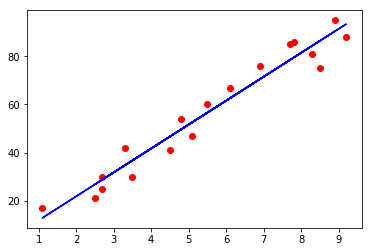

In [14]:
plt.scatter(np.squeeze(X_train), np.squeeze(y_train), color = 'red')
plt.plot(np.squeeze(X_train), np.squeeze(d_simple["Y_prediction_train"]), color ='blue')
plt.show()

### 测试集结果可视化

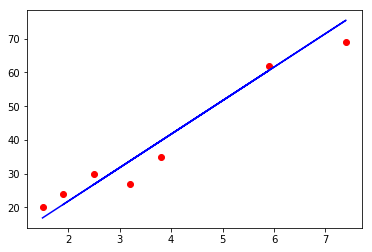

In [15]:
plt.scatter(np.squeeze(X_test), np.squeeze(y_test), color = 'red')
plt.plot(np.squeeze(X_test), np.squeeze(d_simple["Y_prediction_test"]), color ='blue')
plt.show()

## 构建多元线性回归模型分析数据

### 导入数据集
**数据集介绍：**  
该数据集共50个数据项，特征分别为：R&D Spend(研发花费)，Administration(管理经费)，Marketing Spend(市场花费)，state(州)。要预测的内容为Profit(盈利)。
**查看数据集前5行**

In [16]:
dataset = pd.read_csv('datasets/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
def load_dataset():
    data = np.loadtxt("datasets/50_Startups.csv", dtype=np.str, delimiter=",")
    X_train = data[1:,:3].astype(np.float)
    X_dummy = data[1:,3]
    y_train = data[1:,-1].astype(np.float)
    return X_train, X_dummy, y_train

In [18]:
train_X, X_dummy, train_y = load_dataset()

### 使用分类数据方法处理虚拟变量

In [19]:
def dummy_variable(X):
    '''
    输入：
    X -- 虚拟变量
    输出：
    set_dummy -- 使用分类数据方法处理虚拟变量后的数组
    '''
    num_dummy = len(set(X))
    set_dummy = np.zeros((X.shape[0],num_dummy))
    for i in range(num_dummy):
        set_dummy[:,i][np.where(X==list(set(X))[i])] = 1.
    return set_dummy

In [20]:
set_dummy = dummy_variable(X_dummy)  
train_set_x = np.concatenate((train_X,set_dummy),axis = 1)

### 躲避虚拟变量陷阱

In [21]:
train_set_x = train_set_x[:,:-1]

### 数据归一化处理

In [22]:
def normalization(X):
    '''
    输入：
    X -- 训练数据，大小为(特征数, 样本数量)
    输出：
    X -- 归一化后的训练数据，大小为(特征数, 样本数量)
    x_max -- 原训练数据中每类特征的最大值
    x_min -- 原训练数据中每类特征的最小值
    ''' 
    x_max = np.max(X,axis=0,keepdims=True)
    x_min = np.min(X,axis=0,keepdims=True)
    X = (X - x_min)/(x_max - x_min)
    return X,x_max,x_min

In [23]:
train_set_x,x_max,x_min = normalization(train_set_x)

### 拆分数据集为训练集和测试集

In [24]:
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(train_set_x, train_y, test_size = 0.2, random_state = 0)

### 将数据集转换为矢量

In [25]:
train_set_x, train_set_y = train_set_x.T, train_set_y.T.reshape(1,-1)
test_set_x, test_set_y = test_set_x.T, test_set_y.T.reshape(1,-1)

### 模型训练与测试
#### 使用最小二乘法

In [26]:
d_multiple1 = model(train_set_x, train_set_y, test_set_x, test_set_y, optimization = "least squares")

Test data predict value : [[103015.20159796 132582.27760816 132447.73845174  71976.09851258
  178537.48221055 116161.24230165  67851.69209676  98791.73374687
  113969.43533012 167921.0656955 ]]
The test data true value: [[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
   97483.56 110352.25 166187.94]]


#### 使用梯度下降法

In [27]:
d_multiple2 = model(train_set_x, train_set_y, test_set_x, test_set_y, optimization = "gradient descent", num_iterations = 3000, learning_rate = 0.5)

Cost after iteration 0: 6807997862.101883
Cost after iteration 200: 43371803.699051
Cost after iteration 400: 40947393.054603
Cost after iteration 600: 40795651.773923
Cost after iteration 800: 40786137.392499
Cost after iteration 1000: 40785540.810488
Cost after iteration 1200: 40785503.402879
Cost after iteration 1400: 40785501.057301
Cost after iteration 1600: 40785500.910226
Cost after iteration 1800: 40785500.901004
Cost after iteration 2000: 40785500.900426
Cost after iteration 2200: 40785500.900389
Cost after iteration 2400: 40785500.900387
Cost after iteration 2600: 40785500.900387
Cost after iteration 2800: 40785500.900387
Test data predict value : [[103015.20160276 132582.27759601 132447.7384391   71976.09850775
  178537.48219813 116161.24231955  67851.69209773  98791.73374919
  113969.43533513 167921.06567985]]
The test data true value: [[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
   97483.56 110352.25 166187.94]]
